## Currency  Classifier (Nepali Currency)

### importing important libraries

In [126]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import os


### connecting google drive with colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
base_dir = "/content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/Dataset/"


### creating imageDataGenerator to increase the number of training dataset

In [108]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [119]:
train_generator = train_datagen.flow_from_directory(
        "/content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/Dataset/training",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 2080 images belonging to 6 classes.


In [118]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        "/content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/Dataset/test",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 175 images belonging to 6 classes.


### Designing a model for classifier

In [115]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [116]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
history = model.fit_generator(
      train_generator,      
      epochs=10,
      validation_data=test_generator
      )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
65/65 [==============================] - 328s 5s/step - loss: 1.0701 - accuracy: 0.5668 - val_loss: 2.1821 - val_accuracy: 0.4057
Epoch 2/10
65/65 [==============================] - 310s 5s/step - loss: 0.6033 - accuracy: 0.7894 - val_loss: 1.8609 - val_accuracy: 0.5543
Epoch 3/10
65/65 [==============================] - 310s 5s/step - loss: 0.3586 - accuracy: 0.8668 - val_loss: 1.6302 - val_accuracy: 0.6571
Epoch 4/10
65/65 [==============================] - 310s 5s/step - loss: 0.2441 - accuracy: 0.9149 - val_loss: 1.8829 - val_accuracy: 0.6857
Epoch 5/10
65/65 [==============================] - 310s 5s/step - loss: 0.2072 - accuracy: 0.9317 - val_loss: 2.2268 - val_accuracy: 0.6629
Epoch 6/10
65/65 [==============================] - 310s 5s/step - loss: 0.2086 - accuracy: 0.9346 - val_loss: 2.3546 - val_accuracy: 0.6343
Epoch 7/10
65/65 [==============================] - 310s 5s/step - loss: 0.1333 - accuracy: 0.9534 - val_loss: 2.5253 - val_accuracy: 0.5829
Epoch 8/10
65

### Ploting the accuracy and loss of this model

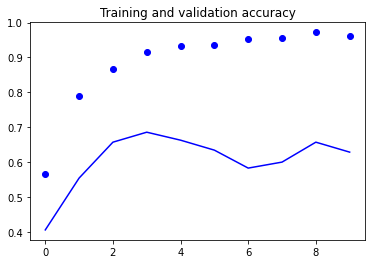

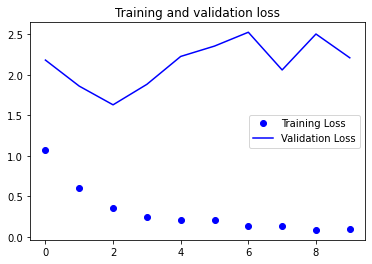

In [121]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## checking the model with other rupeese note

In [122]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("1000")
  if classes[0][3] == 1:
    print("20")
  if classes[0][4] == 1:
    print("50")
  if classes[0][5] == 1:
    print("500")

Saving Compressed_IMG_20181007_104122.jpg to Compressed_IMG_20181007_104122.jpg
[[1. 0. 0. 0. 0. 0.]]
Compressed_IMG_20181007_104122.jpg
10


### Saving the model

In [123]:
!mkdir -p saved_model
model.save("/content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/my_model") 

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/my_model/assets


Printing the history of the model

In [124]:
new_model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Nepali Currency Classifier/my_model")

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

### cross checking of the model with othe rupeese note

In [125]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes[0][0] == 1:
    print("10")
  if classes[0][1] == 1:
    print("100")
  if classes[0][2] == 1:
    print("1000")
  #if classes[0][3] == 1:
    #print("200")
  if classes[0][3] == 1:
    print("20")
  if classes[0][4] == 1:
    print("50")
  if classes[0][5] == 1:
    print("500")

Saving Compressed_IMG_20180717_111750_1.jpg to Compressed_IMG_20180717_111750_1.jpg
[[0. 0. 1. 0. 0. 0.]]
Compressed_IMG_20180717_111750_1.jpg
1000
